## Content

- [Preparation](#preparation)
- [Objectives](#objectives)

- [Review](#review)

- [Regularization Techniques](#regularization_techniques)

- [Questions](#questions)

- [Appendix](#appendix)


#### Class Preparation

<a name="preparation"></a>

- Learn.co -- Section-28 Bias-Variance Trade-Off

- [Toward Datascience Article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/) 2.2.2 The Bias-Variance Trade-off and 6.2 Shrinkage Methods


#### Objectives 
<a name="objectives"></a>

- Bias-Variance trade-off

- Understand what is regularization

- Understand the effect of hyper-parameter $\lambda$ in Ridge and Lasso.

- Understand the similarities and differences between Lasso-Ridge-Linear models.

- Apply Lasso and Ridge with sklearn and understand the parameters.

### Review
<a name="review"></a>



[__Overfitting - Underfitting__](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

<img src="underfitting_overfitting.png" alt="Bias-Variance" style="width: 500px;"/>

[__Bias - Variance Trade-Off__](http://scott.fortmann-roe.com/docs/BiasVariance.html)

<img src="bias_variance_trade_off.png" alt="Bias-Variance" style="width: 400px;"/>



__Linear Model__


$$ Y = \beta_{0} + \beta_{1}X_1 + \beta_{2}X_{2} + \cdots + \beta_{p}X_{p} + \varepsilon $$

 - We train model to understand the paramaters $\beta_{i}$ 
 
 - Use linear algebra or gradient descent to find parameters to minimize:
 
 $$ J(\beta) = \sum\limits_{i=0}^{n} (y_{i} - \beta_{0} - \beta_{1}X_{i1} - \beta_{2}X_{i2} - \cdots - \beta_{p}X_{ip})^{2} $$

over fitting: fit the noise but not the signal
under fitting: didn't predict anything
Linear model, low variance
bias, model should be linear
variance, when changing the sample, model has variance 
regularization, decrease variance.
p values are not related.
Leakage


In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
# 

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # provide interactions 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [3]:
# load data 
df = pd.read_csv('Credit.csv', index_col = 0)

In [4]:
# let's see the head of the dataset
display(HTML(df.head().to_html()))
df.shape

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


(400, 11)

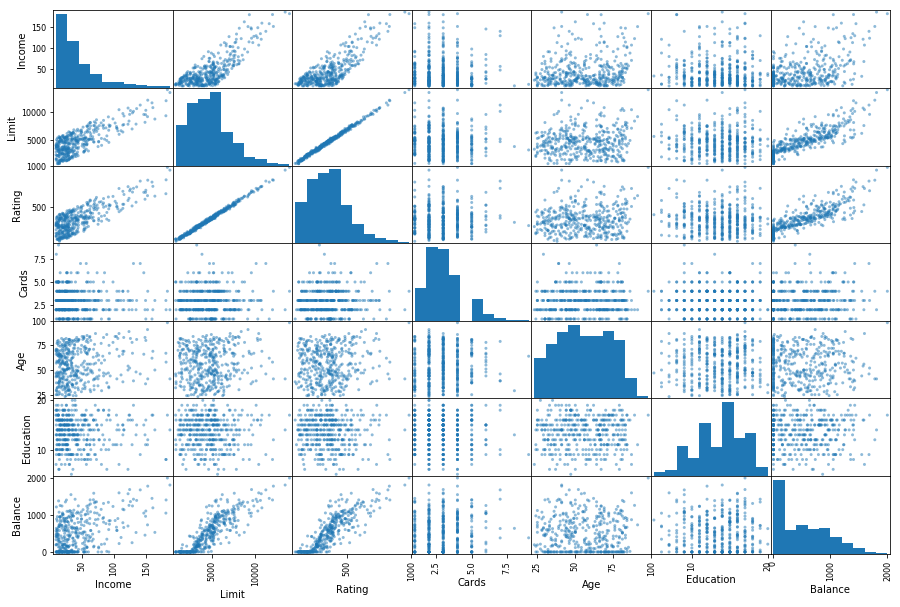

In [5]:
# Scatter_matrix plots are useful tool to see the relationship between columns.
# Note that categorical values omitted automatically
scatter_matrix(df, figsize = (15,10))
plt.show()

In [6]:
## For the purpose of simplicity let's ignore categorical variables
df2 = df.select_dtypes(exclude='object').loc[:]

df2.drop(columns = 'Balance', inplace = True)

In [7]:
X = df2.values
y = df.Balance.values.reshape(-1,1)

print('Shape of the dataset is:', X.shape)


## Create higher order terms
poly = PolynomialFeatures(degree=3)
Xp = poly.fit_transform(X)

print('After adding higher order terms: ', Xp.shape)

Shape of the dataset is: (400, 6)
After adding higher order terms:  (400, 84)


In [8]:
def model_expreriment(num_iter = 5, models = ['ols', 'ridge', 'lasso'], complexity = 'simple'):
    
    x_axis = np.arange(num_iter)
    y_ols_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'ols' in models:
            lr = LinearRegression()

            lr.fit(X_train, y_train)
            
            sample_models['ols'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_ols_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = 10, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #         print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = 10, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #         print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'ols' in models:
        plt.plot(y_ols_test, label = 'ols')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylim([0,1])
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    plt.legend()
    return sample_models


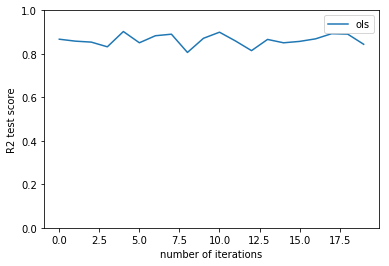

In [9]:
trained_models = model_expreriment(num_iter=20, 
                                   models = ['ols'], 
                                   complexity= 'simple')

In [9]:
## After run model_experiment with complexity == 'polynomial'

# lr_ols = trained_models['ols']
# lr_lasso = trained_models['lasso']
# lr_ridge =trained_models['ridge']

# df_coef = pd.DataFrame(data = {'ols': lr_ols.coef_[0],
#                        'ridge': lr_ridge.coef_[0],
#                        'lasso': lr_lasso.coef_})

# print(df_coef[df_coef.ols !=0.0].shape,
#       df_coef[df_coef.ridge !=0.0].shape, 
#       df_coef[df_coef.lasso !=0.0].shape)

# df_coef.head()



linear model, high variance with high complicity
lasso has feature selection, select features, can get rid of features
ridge algorithm is more smooth, if we don't want to get rid of a feature, use ridge



### Regularization Techniques

<a name="regularization_techniques"></a>


- Why?

    - Reduces complexity
    
    - Reduce the chance of ovefitting.
    
    - Reduces model's variance at the expense of introducing small bias
    
    - Increases model's interprettability.
    
    - Help to deal with colinearity



#### Ridge regularization

Instead of minimizing $J(\beta)$ (least squares method), we will minimize:

$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p} \beta_{i}^{2} $$

#### Lasso regularization

Instead of minimizing $J(\beta)$, we will minimize:

$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p}| \beta_{i} | $$

#### Effect of $\lambda$ in Lasso and Ridge

<img src="lasso_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<img src="ridge_effect_of_lambda.png" alt="Lasso-Lambda" style="width: 500px;"/>

<a name='questions'></a>
### Questions



Q. Should I do normalization for Lasso or Ridge?

A. Yes? Why?

Q. When we know that Ridge and Lasso is better than vanilla linear regression?

A. High variation in your model --> Colinearity and too many variables.

Q. How do we know whether we should choose Lasso or Ridge?

A. Most of the time they perform very similar but Lasso has the feature selection property, ridge doesn't have this.

Q: How do we choose $\lambda$?

A. [sklearn gridsearch](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) for small models or random grid search for bigger models.

#### Appendix
<a name='appendix'></a>

Here I would like to add some reading material that I found useful while working with the code.


- [pd.get_dummies or OneHotEncoder? - Read second answer](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons)

- [On dummy variable trap](https://www.algosome.com/articles/dummy-variable-trap-regression.html)

- [sklearn.preprocessing.PolynomialFeatures documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

- [A great notebook on Lasso and Ridge](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

- [Another good blog post on Lasso and Ridge](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

Image Sources in order of appearance: 
- https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

- https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

- ISLR

In [ ]:
ridge is smooth
lasso is dramatic!!
